<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
#Estandarizamos los headers 
def clean_headers(x):
  x.columns = [i.lower().replace(' ','_') for i in x.columns]
  x['effective_to_date']= pd.to_datetime(x['effective_to_date'],errors='coerce')
  return x

In [5]:
data = clean_headers(data)

In [6]:
#Checamos que columnas cuentas con datos NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [7]:
#Dividimos la data en numerica y categorica 
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(include=np.object)

In [ ]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


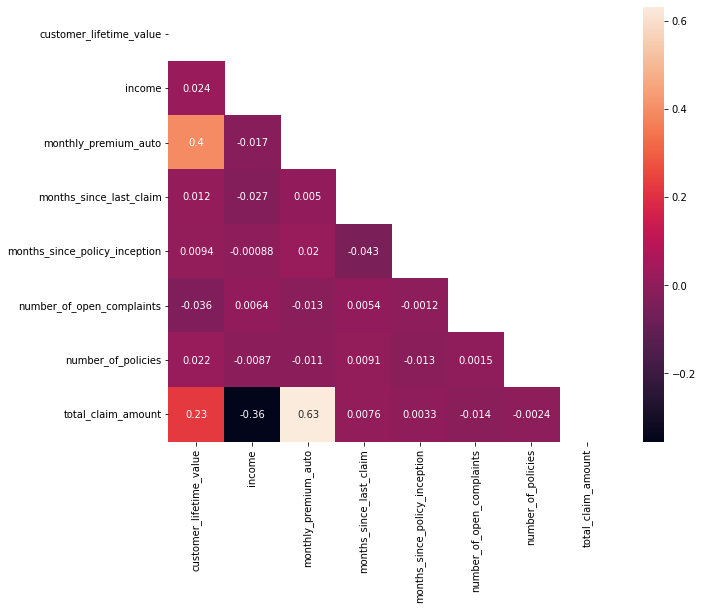

In [ ]:
#Checamos la correlación que existe entre los daatos numericos 
corr_matrix = data_num.corr(method='pearson')
mascara = np.zeros_like(corr_matrix)
# aquoi me traigo el triangulo superior con su diagonal, pero solo los indices 
mascara[np.triu_indices_from(mascara)]=True

fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corr_matrix,mask=mascara,annot=True)

In [ ]:
#Verificamos las distribuciones de la data numerica 
for i in data_num:
  sns.distplot(data_num[i])
  plt.show()

In [ ]:
#BoxCox
for i in data_num:
  #print(i)
  #checamos el % de los negativos de las columnas, ya que BoxCox es preferible aplicarla cuando toda la dta es positiva
  positive = 100*len(data_num[data_num[i]<=0])/len(data_num[i])
  if positive > 0:
    data_num[i] = np.where(data_num[i]<0,0,data_num[i]) 
    data_num[i] = data_num[i].replace(0,np.sum(data_num[i])/len(data_num[i]))
  #print(i,positive)

In [ ]:
data_num

In [ ]:
for i in data_num:
  data_num[i],lmbda = stats.boxcox(data_num[i])

In [ ]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2.703839,42.114983,0.685347,10.809132,3.017301,-5.941376,0.000000,33.035752
1,2.754926,38.346277,0.685871,5.783269,18.770387,-5.941376,1.424359,56.357614
2,2.780772,40.735368,0.686039,7.311427,17.380225,-5.941376,0.607328,40.071789
3,2.759125,38.346277,0.686018,7.311427,26.144855,-5.941376,1.363462,38.763252
4,2.704995,39.734641,0.685461,5.448624,19.451130,-5.941376,0.000000,19.560154
...,...,...,...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968,-5.941376,0.607328,23.588905
9130,2.711030,33.627127,0.685606,6.106927,13.703207,-5.941376,0.000000,32.792951
9131,2.762062,38.346277,0.685725,4.363742,17.026248,0.311563,0.607328,47.263726
9132,2.758397,33.751319,0.685898,11.248499,1.667661,-5.941376,0.893486,44.225147


In [ ]:
for i in data_num:
  sns.distplot(data_num[i])
  plt.show()

In [ ]:
#Checamos si existen nulos en la data categorica 
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [ ]:
data_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [ ]:
#concatenamos la data numerica y categorica 
data2 = pd.concat([data_cat,data_num],axis=1)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   employmentstatus               9134 non-null   object 
 6   gender                         9134 non-null   object 
 7   location_code                  9134 non-null   object 
 8   marital_status                 9134 non-null   object 
 9   policy_type                    9134 non-null   object 
 10  policy                         9134 non-null   object 
 11  renew_offer_type               9134 non-null   object 
 12  sales_channel                  9134 non-null   o

In [ ]:
#X-y split
y=data2['total_claim_amount']
X=data2.drop('total_claim_amount',axis=1)

In [ ]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object)

In [ ]:
#Labels
labels=preprocessing.OrdinalEncoder().fit(X_cat).transform(X_cat)
labels

array([[6.000e+02, 4.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        1.000e+00],
       [5.946e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [9.600e+01, 2.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        1.000e+00],
       ...,
       [6.688e+03, 1.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [7.214e+03, 1.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.434e+03, 1.000e+00, 0.000e+00, ..., 2.000e+00, 5.000e+00,
        1.000e+00]])

In [ ]:
X=np.concatenate((X_num,labels),axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
#Haciendo el modelo lineal, con una regresión
lm=linear_model.LinearRegression()

#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
#prediccion con transformación boxcox, sin quitar ninguna columna
r2_score(y_test,predictions)

0.5396131372805375

# Predicción 2

In [ ]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [ ]:
def clean_headers(x):
 x.columns = [i.lower().replace(' ','_') for i in x.columns]
 x['effective_to_date']= pd.to_datetime(x['effective_to_date'],errors='coerce')
 return x

In [ ]:
data = clean_headers(data)

In [ ]:
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(include=np.object)

In [ ]:
for i in data_num:
   positive = 100*len(data_num[data_num[i]==0])/len(data_num[i])
   print(i,positive)
#vemos que number_of_open_complaints es casi el 80% de puros ceros, la cual no me aporta informacion, por lo tanto 
#quitará de la data numerica, los demás no representan porcentaje grande de ceros, porlo tanto habrá que analizar que hacerles 

customer_lifetime_value 0.0
income 25.366761550251805
monthly_premium_auto 0.0
months_since_last_claim 3.437705276987081
months_since_policy_inception 0.9086927961462667
number_of_open_complaints 79.39566455003285
number_of_policies 0.0
total_claim_amount 0.0


In [ ]:
data_num = data_num.drop('number_of_open_complaints',axis=1)

In [ ]:
data_num

In [ ]:
avg_income = stat.mean(data_num['income'])
median_mslc = stat.median(data_num['months_since_last_claim'])
median_mspi = stat.median(data_num['months_since_policy_inception'])

In [ ]:
data_num['income'] = data_num['income'].replace(0,avg_income)

In [ ]:
data_num['months_since_last_claim'] = data_num['months_since_last_claim'].replace(0,median_mslc)
data_num['months_since_policy_inception'] = data_num['months_since_policy_inception'].replace(0,median_mspi)

In [ ]:
data_num

In [ ]:
#quitanos customer
data_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [ ]:
data_cat.pop('customer')

In [ ]:
data_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [ ]:
data2 = pd.concat([data_cat,data_num],axis=1)

In [ ]:
data2

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,...,sales_channel,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,...,Agent,Two-Door Car,Medsize,2763.519279,56274.000000,69,32,5,1,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,...,Agent,Four-Door Car,Medsize,6979.535903,37657.380009,94,13,42,8,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,...,Agent,Two-Door Car,Medsize,12887.431650,48767.000000,108,18,38,2,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,...,Call Center,SUV,Medsize,7645.861827,37657.380009,106,18,65,7,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,...,Agent,Four-Door Car,Medsize,2813.692575,43836.000000,73,12,44,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,...,Web,Four-Door Car,Medsize,23405.987980,71941.000000,73,18,89,2,198.234764
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,...,Branch,Four-Door Car,Medsize,3096.511217,21604.000000,79,14,28,1,379.200000
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,...,Branch,Four-Door Car,Medsize,8163.890428,37657.380009,85,9,37,2,790.784983
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,...,Branch,Four-Door Car,Large,7524.442436,21941.000000,96,34,3,3,691.200000


In [ ]:
y = data2['total_claim_amount']
X = data2.drop('total_claim_amount',axis=1)

In [ ]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object)

In [ ]:
#usaremos Standarize 
transformer=StandardScaler().fit(X_num)
x_stan=transformer.transform(X_num)

In [ ]:
#Labels 
labels = preprocessing.OrdinalEncoder().fit(X_cat).transform(X_cat)
labels

array([[4., 0., 0., ..., 0., 5., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [2., 0., 2., ..., 0., 5., 1.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 2., 5., 1.]])

In [ ]:
X=np.concatenate((x_stan,labels),axis=1)

In [ ]:
#Haciendo el modelo lineal, con una regresión
lm=linear_model.LinearRegression()

#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [ ]:
predictions=lm.predict(X_test)

In [ ]:
r2_score(y_test,predictions)
#en esta predicción se uso la transformacion de standarize y se eliminó la columna 'number_of_open_complainst" debido a que me marcaba mas de un 75% que su datos valian 0 
#con la data categorica se eliminó la columna de customer 

0.5396131372805375

#Predicción 3

In [8]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [ ]:
data

In [10]:
def clean_headers(x):
  x.columns = [i.lower().replace(' ','_') for i in x.columns]
  x['effective_to_date'] = pd.to_datetime(x['effective_to_date'],errors='coerce')
  return x

In [11]:
data = clean_headers(data)

In [12]:
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(include=np.object)

In [13]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


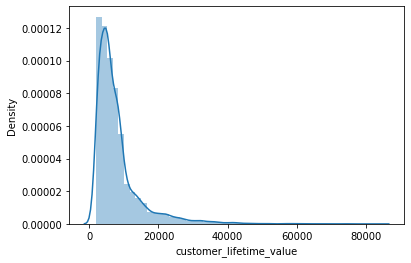

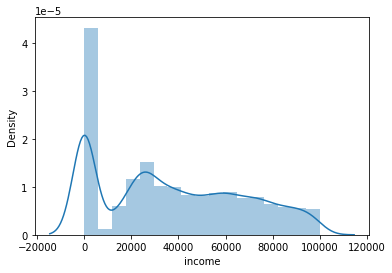

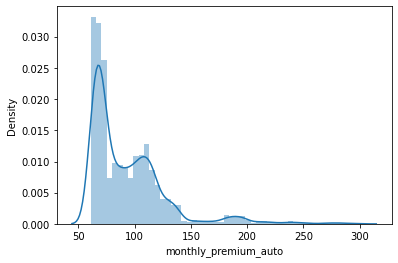

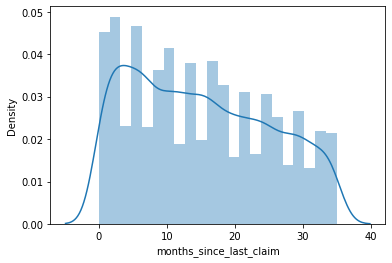

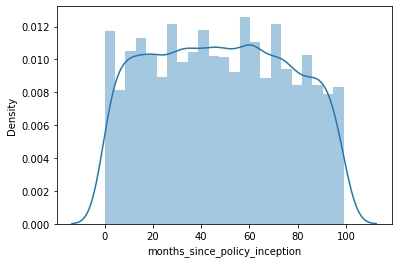

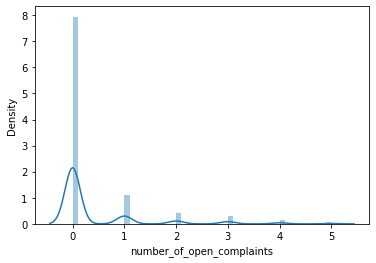

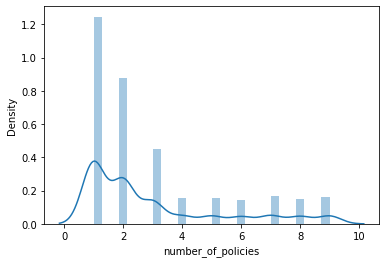

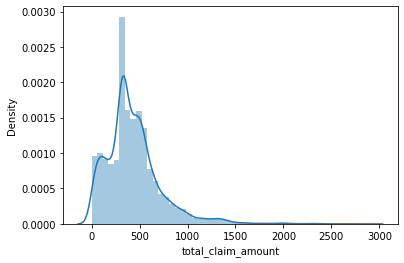

In [ ]:
for i in data_num:
  sns.distplot(data_num[i])
  plt.show()

In [14]:
for i in data_num:
   positive = 100*len(data_num[data_num[i]==0])/len(data_num[i])
   print(i,positive)

customer_lifetime_value 0.0
income 25.366761550251805
monthly_premium_auto 0.0
months_since_last_claim 3.437705276987081
months_since_policy_inception 0.9086927961462667
number_of_open_complaints 79.39566455003285
number_of_policies 0.0
total_claim_amount 0.0


In [15]:
def data_clean(x):
  x = x.drop('number_of_open_complaints',axis=1)
  for i in x.columns:
    x[i] = x[i].replace(0,stat.mean(x[i]))
  return x 

In [16]:
#Se le aplica la función creada
data_num = data_clean(data_num)

In [17]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274.000000,69,32.0,5.0,1,384.811147
1,6979.535903,37657.380009,94,13.0,42.0,8,1131.464935
2,12887.431650,48767.000000,108,18.0,38.0,2,566.472247
3,7645.861827,37657.380009,106,18.0,65.0,7,529.881344
4,2813.692575,43836.000000,73,12.0,44.0,1,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18.0,89.0,2,198.234764
9130,3096.511217,21604.000000,79,14.0,28.0,1,379.200000
9131,8163.890428,37657.380009,85,9.0,37.0,2,790.784983
9132,7524.442436,21941.000000,96,34.0,3.0,3,691.200000


In [22]:
#checamo data categorica 
data_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Four-Door Car,Large


In [19]:
#borramos customer 
data_cat = data_cat.drop('customer',axis=1)

In [21]:
data_cat = data_cat.drop('renew_offer_type',axis=1)
data_cat = data_cat.drop('sales_channel',axis=1)

In [25]:
#boxcot
for i in data_num:
  #print(i)
  #checamos el % de los negativos de las columnas, ya que BoxCox es preferible aplicarla cuando toda la dta es positiva
  positive = 100*len(data_num[data_num[i]<=0])/len(data_num[i])
  if positive > 0:
    data_num[i] = np.where(data_num[i]<0,0,data_num[i]) 
    data_num[i] = data_num[i].replace(0,np.sum(data_num[i])/len(data_num[i]))

In [26]:
for i in data_num:
  data_num[i],lmbda = stats.boxcox(data_num[i])

In [30]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2.703839,42.114983,0.685347,10.809132,3.017301,33.035752
1,2.754926,38.346277,0.685871,5.783269,18.770387,56.357614
2,2.780772,40.735368,0.686039,7.311427,17.380225,40.071789
3,2.759125,38.346277,0.686018,7.311427,26.144855,38.763252
4,2.704995,39.734641,0.685461,5.448624,19.451130,19.560154
...,...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968,23.588905
9130,2.711030,33.627127,0.685606,6.106927,13.703207,32.792951
9131,2.762062,38.346277,0.685725,4.363742,17.026248,47.263726
9132,2.758397,33.751319,0.685898,11.248499,1.667661,44.225147


In [28]:
for i in data_num:
  #print(i)
  #checamos el % de los negativos de las columnas, ya que BoxCox es preferible aplicarla cuando toda la dta es positiva
  positive = 100*len(data_num[data_num[i]<=0])/len(data_num[i])
  print(i,positive)

customer_lifetime_value 0.0
income 0.0
monthly_premium_auto 0.0
months_since_last_claim 3.777096562294723
months_since_policy_inception 0.9305890081015984
number_of_policies 35.59229253339172
total_claim_amount 0.06568863586599519


In [29]:
data_num = data_num.drop('number_of_policies',axis=1)

In [31]:
data2 = pd.concat([data_cat,data_num],axis=1)

In [32]:
data2

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize,2.703839,42.114983,0.685347,10.809132,3.017301,33.035752
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize,2.754926,38.346277,0.685871,5.783269,18.770387,56.357614
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize,2.780772,40.735368,0.686039,7.311427,17.380225,40.071789
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize,2.759125,38.346277,0.686018,7.311427,26.144855,38.763252
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize,2.704995,39.734641,0.685461,5.448624,19.451130,19.560154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Four-Door Car,Medsize,2.801170,44.579684,0.685461,7.311427,33.067968,23.588905
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Four-Door Car,Medsize,2.711030,33.627127,0.685606,6.106927,13.703207,32.792951
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Four-Door Car,Medsize,2.762062,38.346277,0.685725,4.363742,17.026248,47.263726
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Four-Door Car,Large,2.758397,33.751319,0.685898,11.248499,1.667661,44.225147


In [33]:
#X-y split 
y = data2['total_claim_amount']
X = data2.drop('total_claim_amount',axis=1)

In [44]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object)

In [45]:
#stand
transformer=StandardScaler().fit(X_num)
x_stan=transformer.transform(X_num)

In [46]:
#norm
transformer =Normalizer().fit(X_num)
x_norm= transformer.transform(X_num)

In [35]:
#checamos valores unicos para ver si es coveniente hacer onehot o labels

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Four-Door Car,Large


In [43]:
#checamos valores unicos para ver si es coveniente hacer onehot o labels
for i in X_cat.columns:
  
  print (X_cat[i].unique())
  #observamos que no existen tantos valores diferentes

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [47]:
encoder=OneHotEncoder(drop='first').fit(X_cat)
encoder=encoder.transform(X_cat).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [49]:
X=np.concatenate((X_num,encoder),axis=1)

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [55]:
#Haciendo el modelo lineal, con una regresión
lm=linear_model.LinearRegression()

#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [56]:
predictions=lm.predict(X_test)

In [57]:
r2_score(y_test,predictions)

0.8189133156105186